In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist = pd.read_csv('mnist.zip')

In [16]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
mnist.shape

(42000, 785)

# Resampling

Split the data into train and test, and investigate the distribution of digits on each partition.

In [18]:
y = mnist['label'].values
X = mnist[[c for c in mnist.columns if c != 'label']].values

In [19]:
idx = np.arange(len(y))
np.random.shuffle(idx)

train_idx = idx[:10000]
test_idx = idx[10000:15000]

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

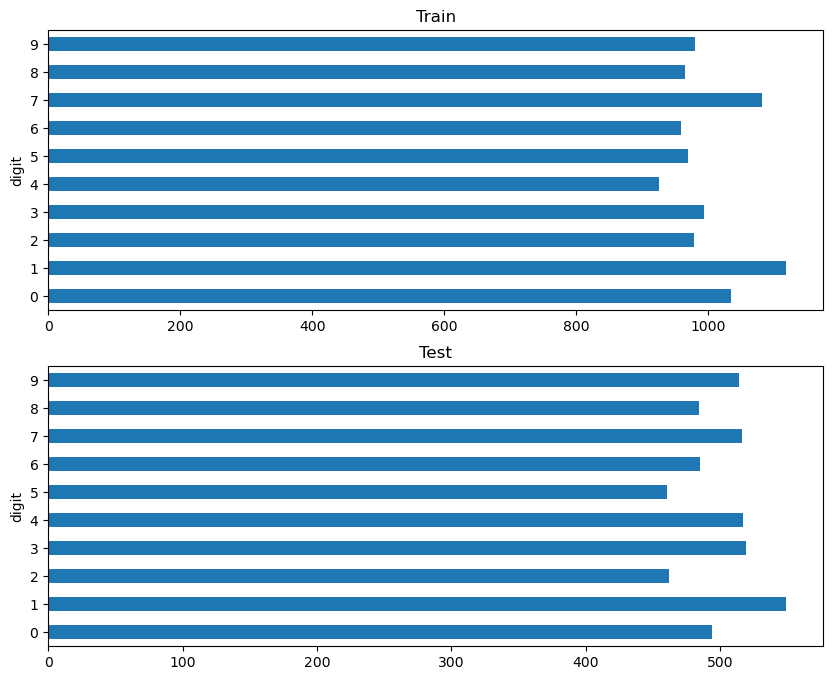

In [20]:
fig, axs = plt.subplots(2, figsize=(10, 8))
pd.DataFrame({'digit': y_train}).groupby('digit').size().plot.barh(ax=axs[0])
pd.DataFrame({'digit': y_test}).groupby('digit').size().plot.barh(ax=axs[1])
axs[0].set_title('Train')
axs[1].set_title('Test')
plt.show()

Plot a sample of the images.

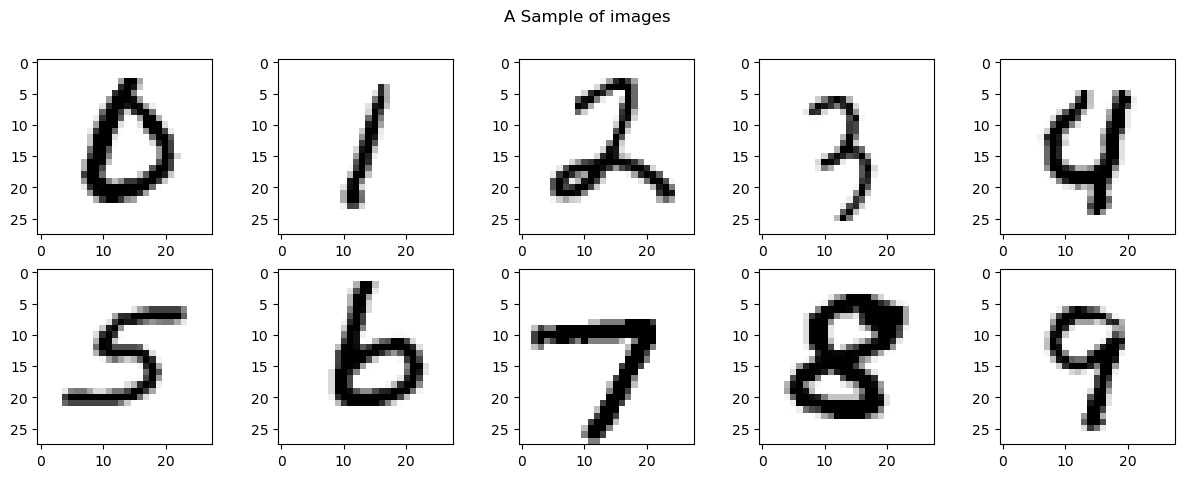

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))
axs = axs.flatten()
for i in range(10):
    mask = (y_train == i)
    axs[i].imshow(X_train[mask][0].reshape(28, 28), cmap='gray_r')
plt.suptitle("A Sample of images")
plt.show()

# Baseline: Logistic Regression

As a baseline we will use the logistic regression model from `scikit-learn`.

In [22]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(max_iter=30)
lr.fit(X_train, y_train)

/Users/troelslaegsgaard/Git/laegsgaardTroels/laegsgaardTroels.github.io/src/posts/2023-09-30-reinforcement-learning-cartpole-v0/envs/reinforcement-learning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=30)

In [27]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

print("Train Accuracy", np.mean(y_hat_train == y_train))
print("Test Accuracy", np.mean(y_hat_test == y_test))

Train Accuracy 0.9374
Test Accuracy 0.9008


# Multiclass Perceptron

Multiclass perceptron without intercept.

In [28]:
import numpy as np

class Perceptron:
    
    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.W = np.zeros(shape=(X.shape[1], self.n_classes))
        for x, y_ in zip(X, y):
            y_hat = self.predict(x)
            if y_hat != y_:
                self.W[:, y_] += x
                self.W[:, y_hat[0]] -= x
                    
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        weights = X.dot(self.W)
        return np.argmax(weights, axis=1)

In [29]:
pt = Perceptron()
pt.fit(X_train, y_train)

In [30]:
y_hat_train = pt.predict(X_train)
y_hat_test = pt.predict(X_test)

In [31]:
print("Train Accuracy", np.mean(y_hat_train == y_train))
print("Test Accuracy", np.mean(y_hat_test == y_test))

Train Accuracy 0.8766
Test Accuracy 0.859
